# **Importation des libraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import time
import matplotlib.patches as mpatches
warnings.filterwarnings('ignore')


## **DATA EXPLORATION AND DATA CLEANING**

In [60]:
# Importation des donnees:
Flight_Data=pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Flights1_2019_1.csv'))

Flight_Data.head()

,YEAR,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_ABR,DEP_DELAY,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,Unnamed: 17
0,2019,6,2019-01-19,13487,1348702,31650,"Minneapolis, MN",11193,1119302,33105,"Cincinnati, OH",KY,-10.0,1832.0,-25.0,0.0,0.0,NaN
1,2019,7,2019-01-20,13487,1348702,31650,"Minneapolis, MN",11193,1119302,33105,"Cincinnati, OH",KY,-4.0,1825.0,-37.0,0.0,0.0,NaN
2,2019,1,2019-01-21,13487,1348702,31650,"Minneapolis, MN",11193,1119302,33105,"Cincinnati, OH",KY,-9.0,1845.0,-17.0,0.0,0.0,NaN
3,2019,2,2019-01-22,13487,1348702,31650,"Minneapolis, MN",11193,1119302,33105,"Cincinnati, OH",KY,-4.0,1839.0,-23.0,0.0,0.0,NaN
4,2019,3,2019-01-23,13487,1348702,31650,"Minneapolis, MN",11193,1119302,33105,"Cincinnati, OH",KY,-6.0,1850.0,-12.0,0.0,0.0,NaN


In [5]:
Flight_Data.isnull().sum()

,0
YEAR,0
DAY_OF_WEEK,0
FL_DATE,0
ORIGIN_AIRPORT_ID,0
ORIGIN_AIRPORT_SEQ_ID,0
ORIGIN_CITY_MARKET_ID,0
ORIGIN_CITY_NAME,0
DEST_AIRPORT_ID,0
DEST_AIRPORT_SEQ_ID,0
DEST_CITY_MARKET_ID,0


In [6]:
Flight_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   FL_DATE                583985 non-null  object 
 3   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 4   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 5   ORIGIN_CITY_MARKET_ID  583985 non-null  int64  
 6   ORIGIN_CITY_NAME       583985 non-null  object 
 7   DEST_AIRPORT_ID        583985 non-null  int64  
 8   DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 9   DEST_CITY_MARKET_ID    583985 non-null  int64  
 10  DEST_CITY_NAME         583985 non-null  object 
 11  DEST_STATE_ABR         583985 non-null  object 
 12  DEP_DELAY              567630 non-null  float64
 13  ARR_TIME               566924 non-null  float64
 14  ARR_DELAY              565963 non-nu

In [31]:
Flight_Data.shape

(583985, 18)

# **Conversion de la colonne ARR_Time en time et enlevons la colonne Unnamed:17**

In [61]:


# Fonction pour convertir les valeurs en heures et minutes
def convert_to_hm(arr_time):
    if pd.isna(arr_time):  # Vérifier si la valeur est NaN
        return np.nan
    hours = int(arr_time // 100)  # Partie entière pour les heures
    minutes = int(arr_time % 100)  # Reste pour les minutes
    return f"{hours} :{minutes} "

# Appliquer la fonction à la colonne ARR_TIME
Flight_Data['ARR_TIME'] = Flight_Data['ARR_TIME'].apply(convert_to_hm)
# enlever la colonnne  'Unnamed: 17
Flight_Data.drop('Unnamed: 17',axis=1,inplace=True)
Flight_Data['FL_DATE']=pd.to_datetime(Flight_Data['FL_DATE'])



# **On peut voir que les variables nulles representent seulement 3% des donnees, C'est pourquoi nous avons opter de les drop.**

In [62]:
Flight_Data=Flight_Data.dropna()
FL_DATA_Copy=Flight_Data.copy()

# **Summary of the Data**

In [12]:
Flight_Data.describe()[["YEAR","DAY_OF_WEEK","FL_DATE","DEP_DELAY","ARR_DELAY","ARR_DELAY_NEW","ARR_DEL15"]]

,YEAR,DAY_OF_WEEK,FL_DATE,DEP_DELAY,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15
count,583985.0,583985.000000,583985,567630.000000,565963.000000,565963.000000,565963.000000
mean,2019.0,3.835626,2019-01-15 23:02:31.604578816,9.766091,4.257506,13.654539,0.185917
min,2019.0,1.000000,2019-01-01 00:00:00,-47.000000,-85.000000,0.000000,0.000000
25%,2019.0,2.000000,2019-01-08 00:00:00,-6.000000,-16.000000,0.000000,0.000000
50%,2019.0,4.000000,2019-01-16 00:00:00,-3.000000,-7.000000,0.000000,0.000000
75%,2019.0,5.000000,2019-01-24 00:00:00,5.000000,7.000000,7.000000,0.000000
max,2019.0,7.000000,2019-01-31 00:00:00,1651.000000,1638.000000,1638.000000,1.000000
std,0.0,1.921899,NaN,48.626941,51.159511,47.488893,0.389040


# **DATA VISUALISATION**

## **Distribution of Departure and Arrival Delays**

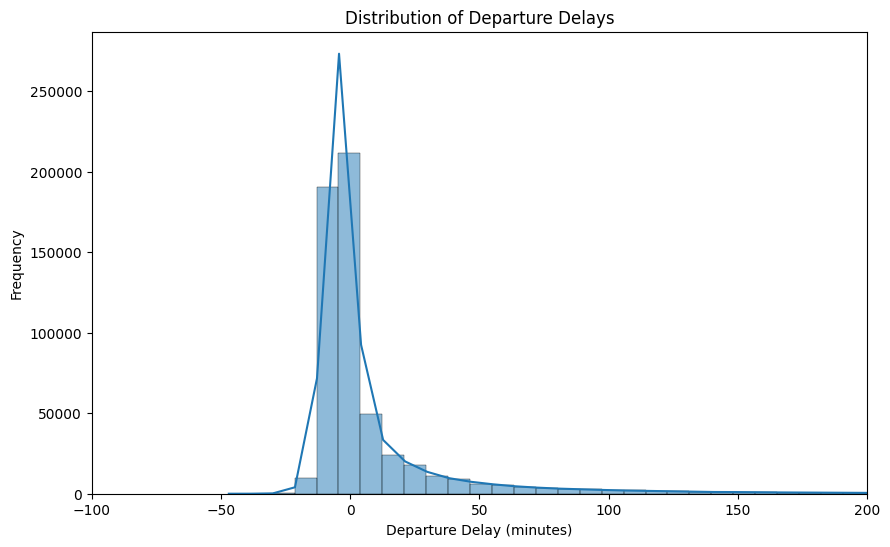

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(Flight_Data['DEP_DELAY'], bins=200, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(-100, 200)
plt.show()

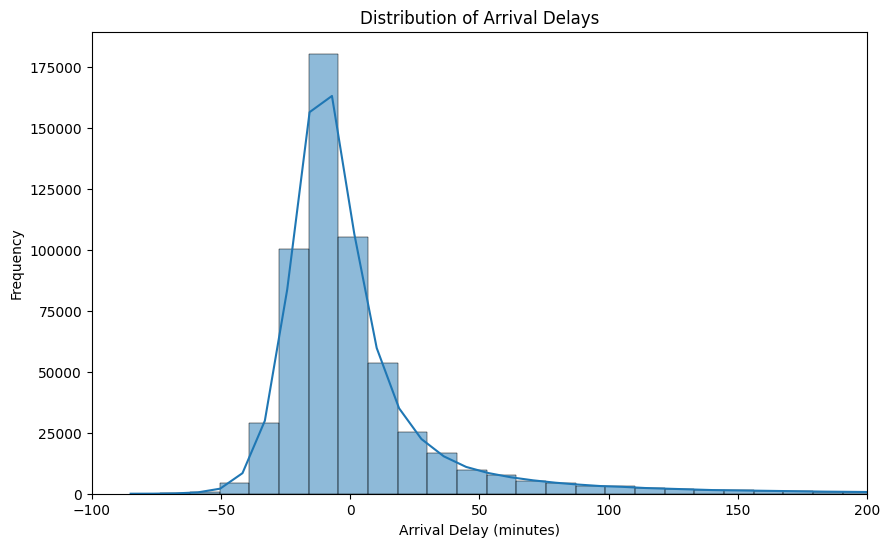

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(Flight_Data['ARR_DELAY'], bins=150, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(-100, 200)
plt.show()

###  Boxplot of departure and arrival delays depending on the Day of Week.

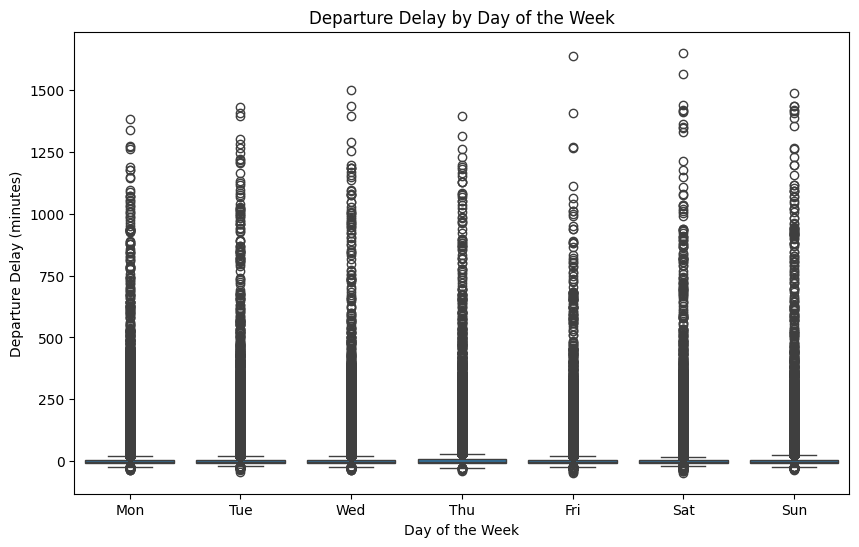

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAY_OF_WEEK', y='DEP_DELAY', data=Flight_Data)
plt.title('Departure Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

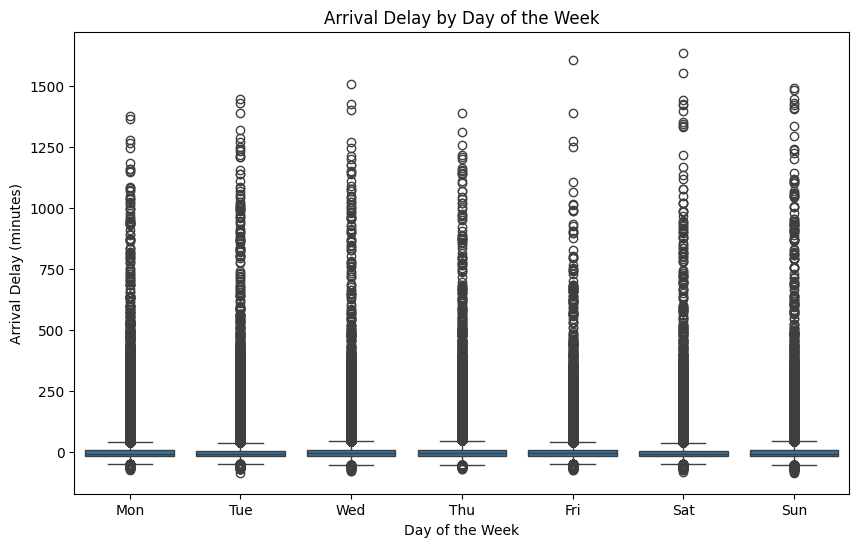

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAY_OF_WEEK', y='ARR_DELAY', data=Flight_Data)
plt.title('Arrival Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### **Boxplot of departure and arrival delays**

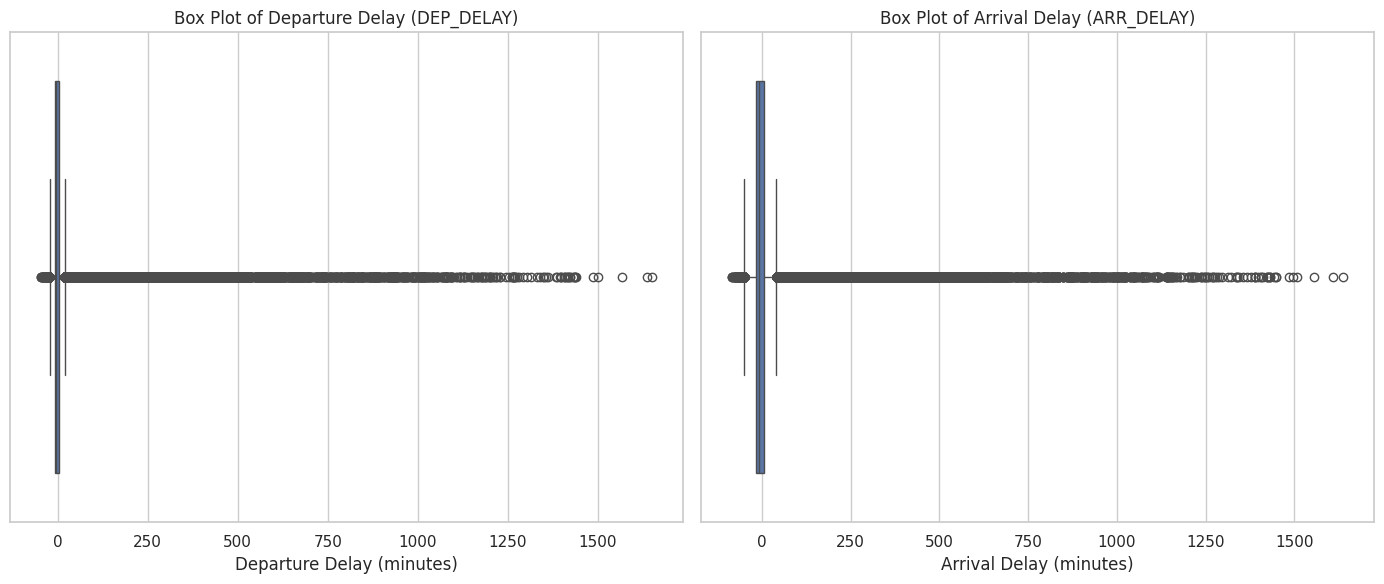

In [56]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Box plot for DEP_DELAY
plt.subplot(1, 2, 1)
sns.boxplot(x=Flight_Data['DEP_DELAY'])
plt.title('Box Plot of Departure Delay (DEP_DELAY)')
plt.xlabel('Departure Delay (minutes)')

# Box plot for ARR_DELAY
plt.subplot(1, 2, 2)
sns.boxplot(x=Flight_Data['ARR_DELAY'])
plt.title('Box Plot of Arrival Delay (ARR_DELAY)')
plt.xlabel('Arrival Delay (minutes)')

# Show the plots
plt.tight_layout()
plt.show()

### **Top 20 Destination Airports by Average Arrival and Departure Delay**

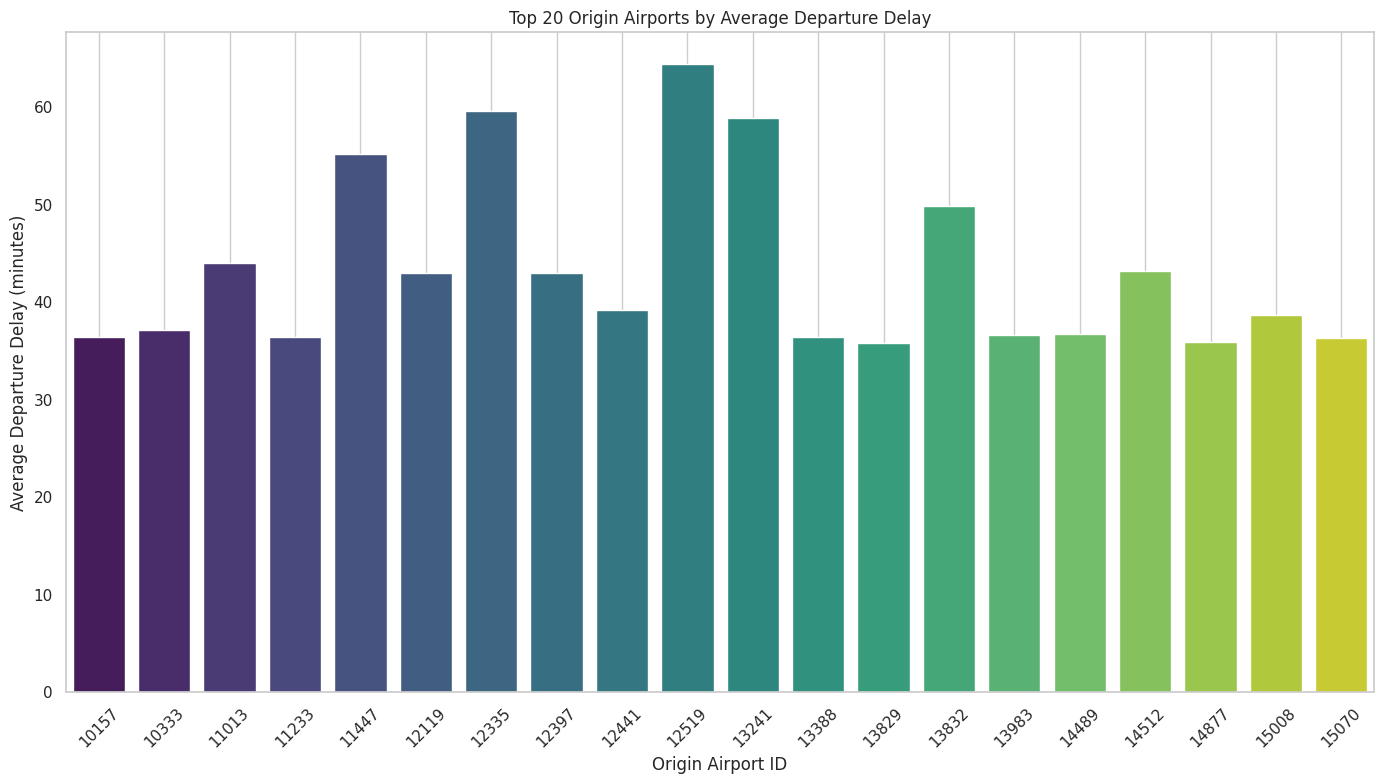

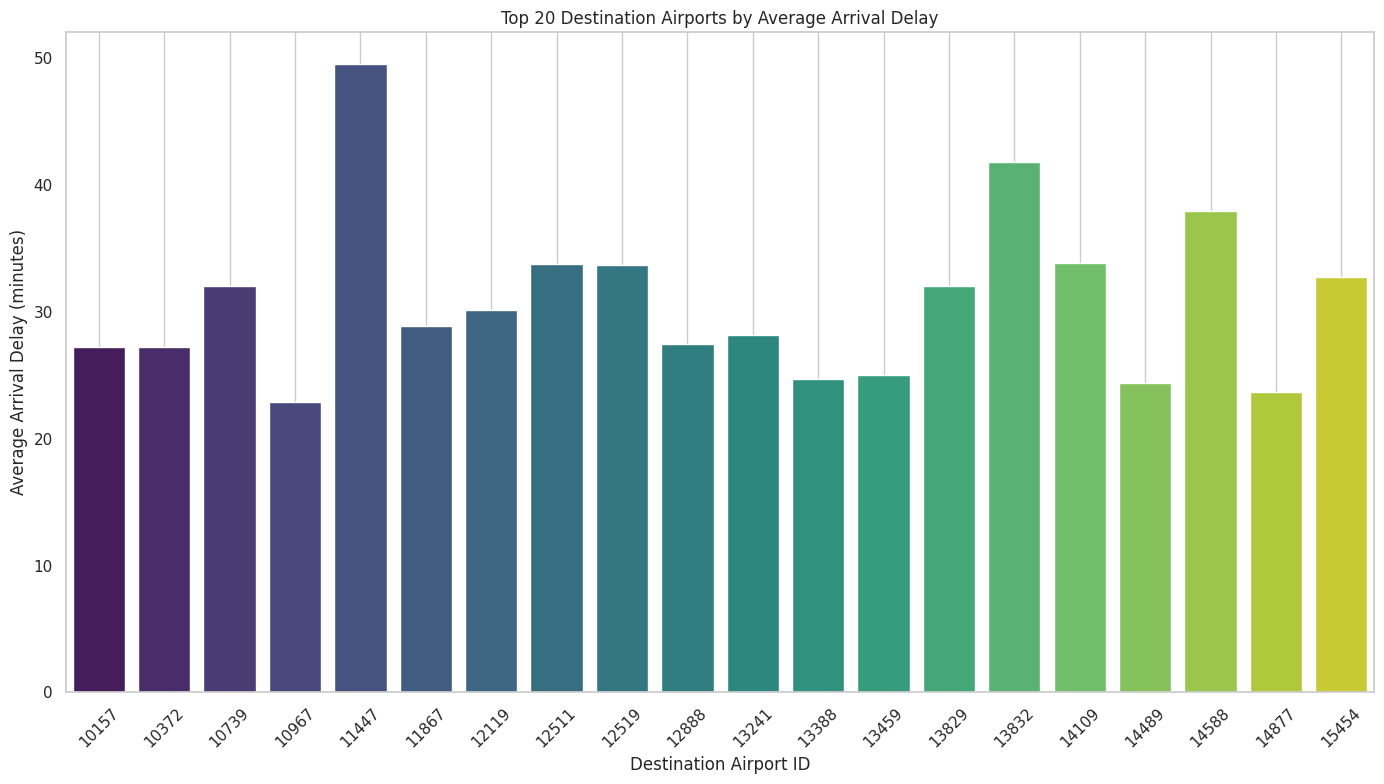

In [54]:
# Calculate average DEP_DELAY by origin airport
avg_dep_delay_origin = Flight_Data.groupby('ORIGIN_AIRPORT_ID')['DEP_DELAY'].mean().reset_index()
avg_dep_delay_origin.rename(columns={'DEP_DELAY': 'AVG_DEP_DELAY'}, inplace=True)

# Calculate average ARR_DELAY by destination airport
avg_arr_delay_dest = Flight_Data.groupby('DEST_AIRPORT_ID')['ARR_DELAY'].mean().reset_index()
avg_arr_delay_dest.rename(columns={'ARR_DELAY': 'AVG_ARR_DELAY'}, inplace=True)
# Sort the average delays
avg_dep_delay_origin_sorted = avg_dep_delay_origin.sort_values(by='AVG_DEP_DELAY', ascending=False)
avg_arr_delay_dest_sorted = avg_arr_delay_dest.sort_values(by='AVG_ARR_DELAY', ascending=False)
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure for average departure delays by origin airport
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_dep_delay_origin_sorted.head(20),
            x='ORIGIN_AIRPORT_ID', y='AVG_DEP_DELAY', palette='viridis')
plt.title('Top 20 Origin Airports by Average Departure Delay')
plt.xlabel('Origin Airport ID')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Create a figure for average arrival delays by destination airport
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_arr_delay_dest_sorted.head(20),
            x='DEST_AIRPORT_ID', y='AVG_ARR_DELAY', palette='viridis')
plt.title('Top 20 Destination Airports by Average Arrival Delay')
plt.xlabel('Destination Airport ID')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### **Top 10 Origin-Destination Pairs by Average Delay**

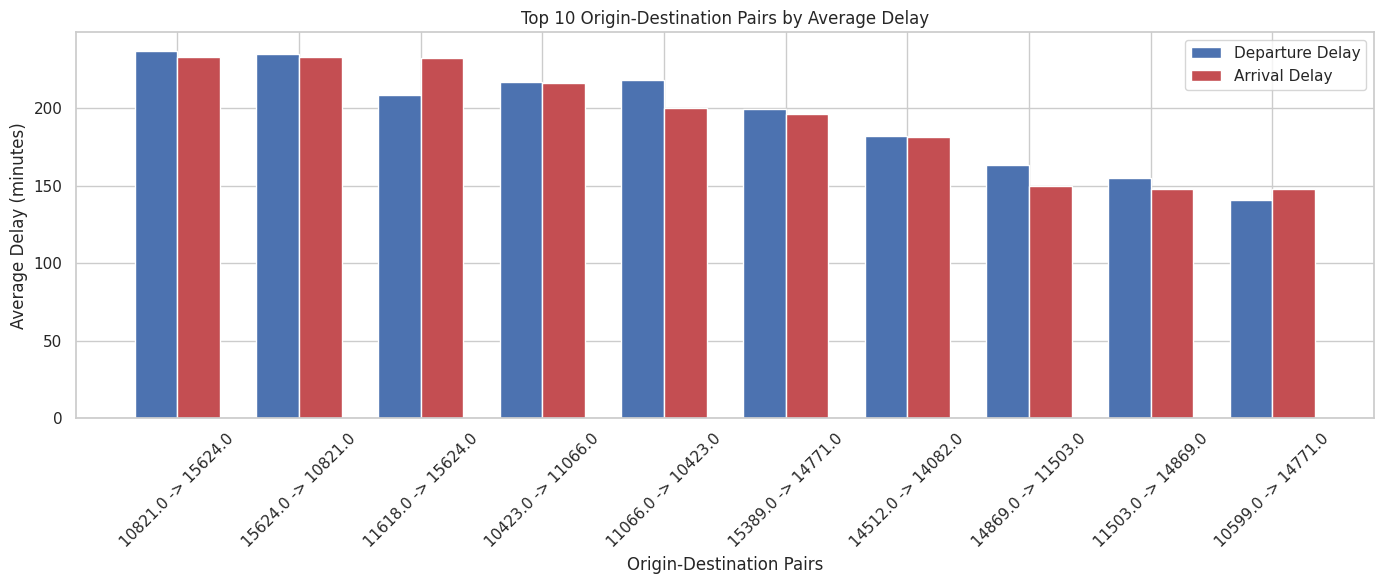

In [55]:
# Sort by average arrival delay
od_delays_sorted_arr = od_delays.sort_values(by='AVG_ARR_DELAY', ascending=False)

# Get the top 10 pairs with the longest arrival delays
top_10_arr_delays = od_delays_sorted_arr.head(10)

# Create a bar chart
plt.figure(figsize=(14, 6))
bar_width = 0.35
index = range(len(top_10_arr_delays))

# Bars for departure delays
plt.bar(index, top_10_arr_delays['AVG_DEP_DELAY'], bar_width, label='Departure Delay', color='b')
# Bars for arrival delays
plt.bar([i + bar_width for i in index], top_10_arr_delays['AVG_ARR_DELAY'], bar_width, label='Arrival Delay', color='r')

plt.xlabel('Origin-Destination Pairs')
plt.ylabel('Average Delay (minutes)')
plt.title('Top 10 Origin-Destination Pairs by Average Delay')
plt.xticks([i + bar_width / 2 for i in index], [f"{row['ORIGIN_AIRPORT_ID']} -> {row['DEST_AIRPORT_ID']}" for index, row in top_10_arr_delays.iterrows()], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### TIME SERIES Average Departure Delays



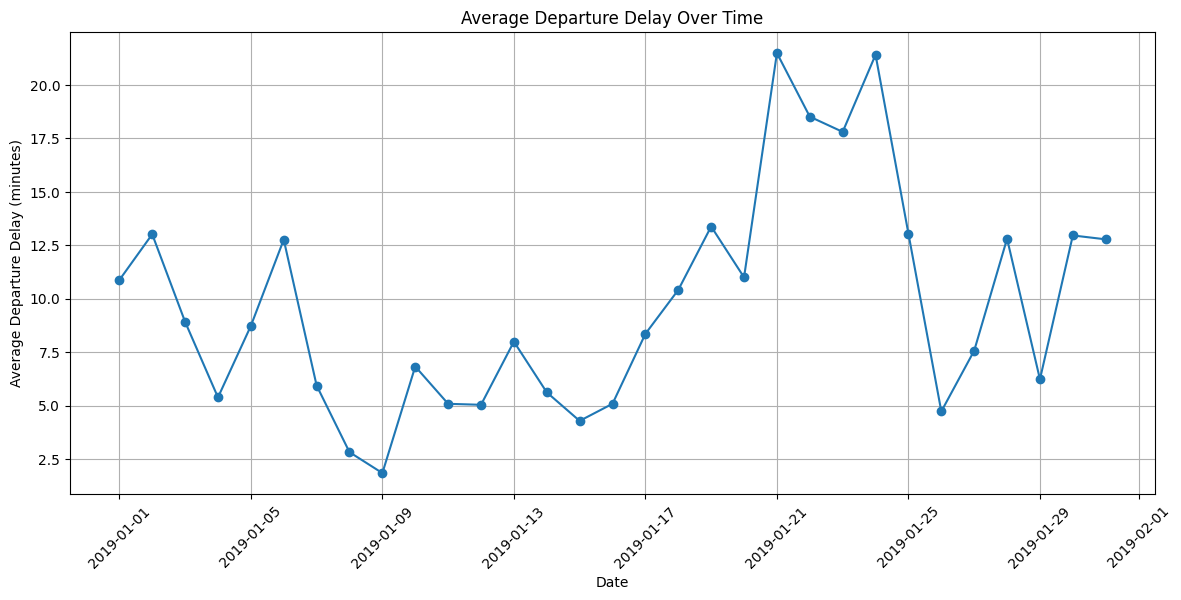

In [52]:
# Convert FL_DATE to datetime
FL_DATA_Copy['FL_DATE'] = pd.to_datetime(FL_DATA_Copy['FL_DATE'])

# Group by date and calculate average departure delay
daily_delay = FL_DATA_Copy.groupby('FL_DATE')['DEP_DELAY'].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_delay['FL_DATE'], daily_delay['DEP_DELAY'], marker='o')
plt.title('Average Departure Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### TIME SERIES Average ARRIVAL Delays

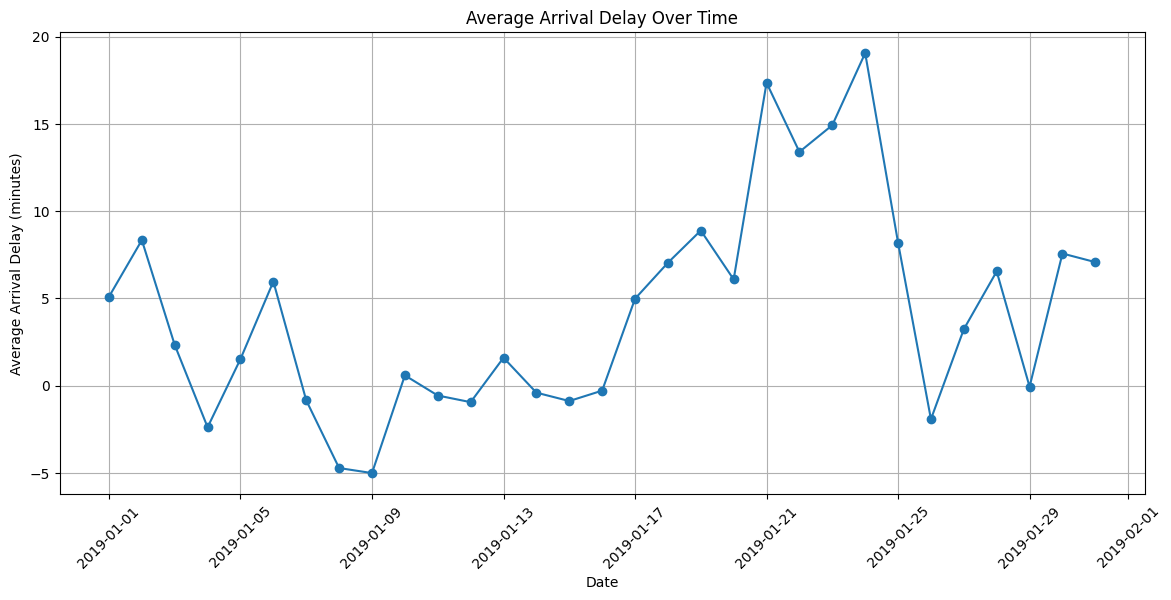

In [53]:
# Convert FL_DATE to datetime
FL_DATA_Copy['FL_DATE'] = pd.to_datetime(FL_DATA_Copy['FL_DATE'])

# Group by date and calculate average Arrival delay
daily_delay = FL_DATA_Copy.groupby('FL_DATE')['ARR_DELAY'].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_delay['FL_DATE'], daily_delay['ARR_DELAY'], marker='o')
plt.title('Average Arrival Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### We can observe 2 pics on 21 and 24 January 2019. We'll analyze them using POWER BI

## Heatmap of Average Departure Delays by Day of the Week and Hour of the Day

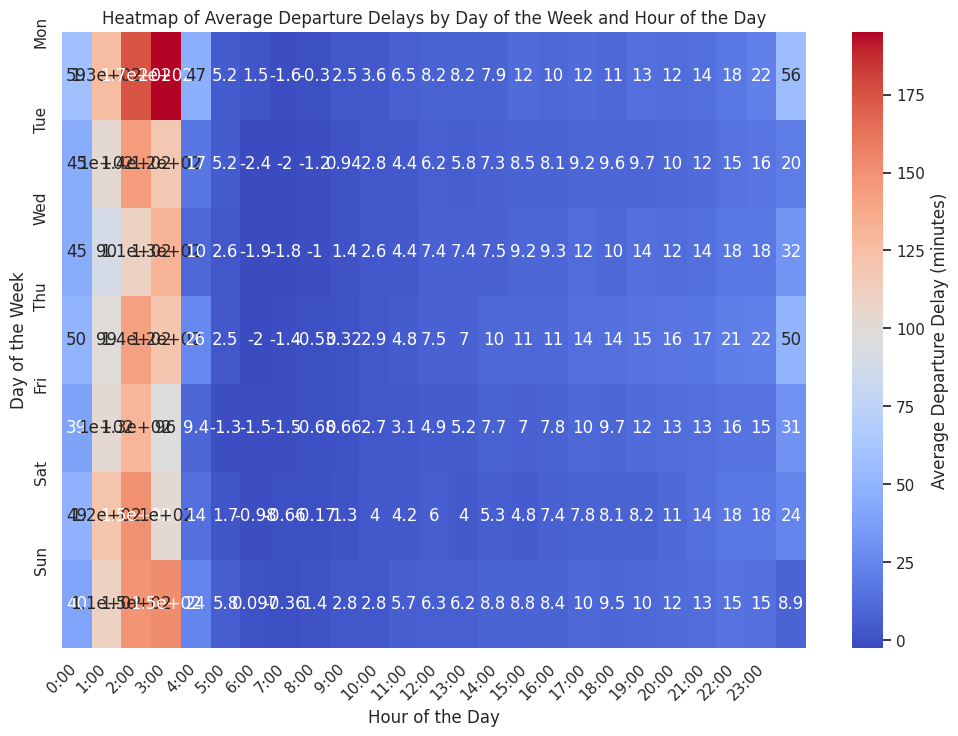

In [63]:
# Create a new column for the hour of departure
FL_DATA_Copy['DEP_HOUR'] = FL_DATA_Copy['ARR_TIME'].str.split(':').str[0].astype(int)

# Create a pivot table for the heatmap
heatmap_data = FL_DATA_Copy.pivot_table(values='DEP_DELAY', index='DAY_OF_WEEK', columns='DEP_HOUR', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Average Departure Delay (minutes)'})
plt.title('Heatmap of Average Departure Delays by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.xticks(ticks=range(24), labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.yticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Departure Delay vs Arrival Delay Before Dimensionality Reduction

Text(0, 0.5, 'Average Arrival Delay (minutes)')

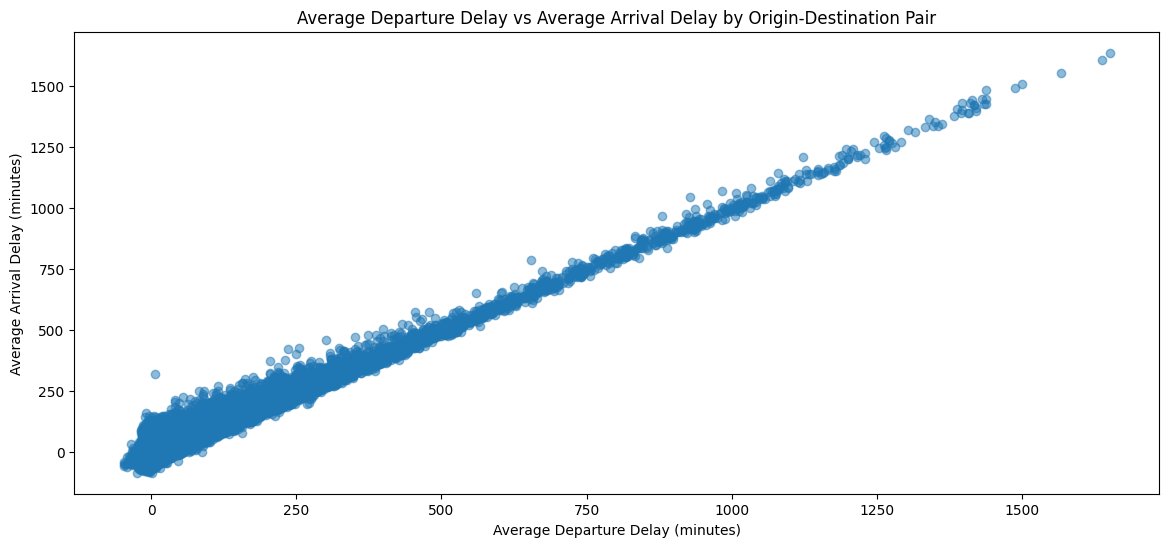

In [43]:
# Scatter Plot DEP_DELAY vs  ARR_DELAY dans od_delays
plt.figure(figsize=(14, 6))
plt.scatter(Flight_Data['DEP_DELAY'], Flight_Data['ARR_DELAY'], alpha=0.5)
plt.title('Average Departure Delay vs Average Arrival Delay by Origin-Destination Pair')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Average Arrival Delay (minutes)')

# **Dimensionality Reduction**

In [44]:

# Group by origin and destination airport
od_delays = Flight_Data.groupby(['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']).agg(
    AVG_DEP_DELAY=('DEP_DELAY', 'mean'),
    AVG_ARR_DELAY=('ARR_DELAY', 'mean'),
    TOTAL_FLIGHTS=('ORIGIN_AIRPORT_ID', 'count')  # Count occurrences of each pair
).reset_index()
# Sort by average departure delay
od_delays_sorted = od_delays.sort_values(by='AVG_DEP_DELAY', ascending=False)

# Display the top 10 pairs with the longest departure delays
top_10_dep_delays = od_delays_sorted.head(10)
Flight_Data=od_delays
Flight_Data

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,AVG_DEP_DELAY,AVG_ARR_DELAY,TOTAL_FLIGHTS
0,10135,10397,7.059701,3.970149,67
1,10135,11057,3.227848,1.721519,85
2,10135,11433,20.611765,14.400000,87
3,10135,11697,44.000000,35.750000,4
4,10135,13930,36.228571,28.857143,45
...,...,...,...,...,...
5530,15919,14761,39.750000,31.500000,12
5531,15919,14771,37.133333,27.266667,31
5532,15991,10926,7.346154,-1.120000,30
5533,15991,12523,-8.896552,-15.080000,30


In [27]:
Flight_Data.shape

(5535, 5)

## Nous passons de 583985 à 5535 data points (qui representent les vols)

## Average Departure Delay vs Average Arrival Delay After Dimensionality Reduction

Text(0, 0.5, 'Average Arrival Delay (minutes)')

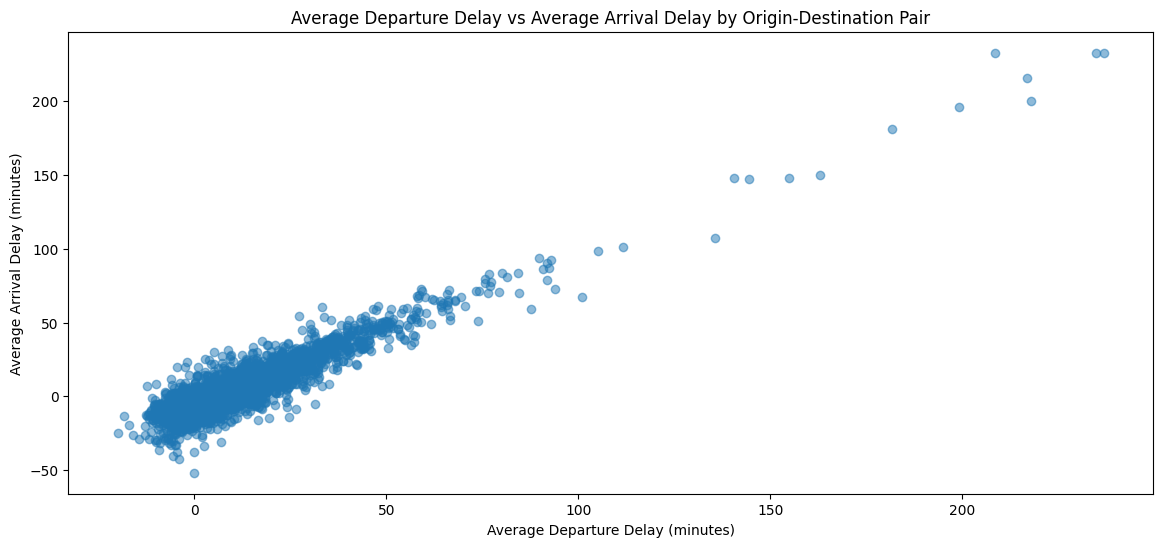

In [45]:
# Scatter Plot AVG_DEP_DELAY vs  AVG_ARR_DELAY dans od_delays
plt.figure(figsize=(14, 6))
plt.scatter(Flight_Data['AVG_DEP_DELAY'], Flight_Data['AVG_ARR_DELAY'], alpha=0.5)
plt.title('Average Departure Delay vs Average Arrival Delay by Origin-Destination Pair')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Average Arrival Delay (minutes)')

# Anomaly Detection Techniques
We are implementing four methods which are DBSCAN,
Isolation Forest, Local Outlier Factor, and KNN

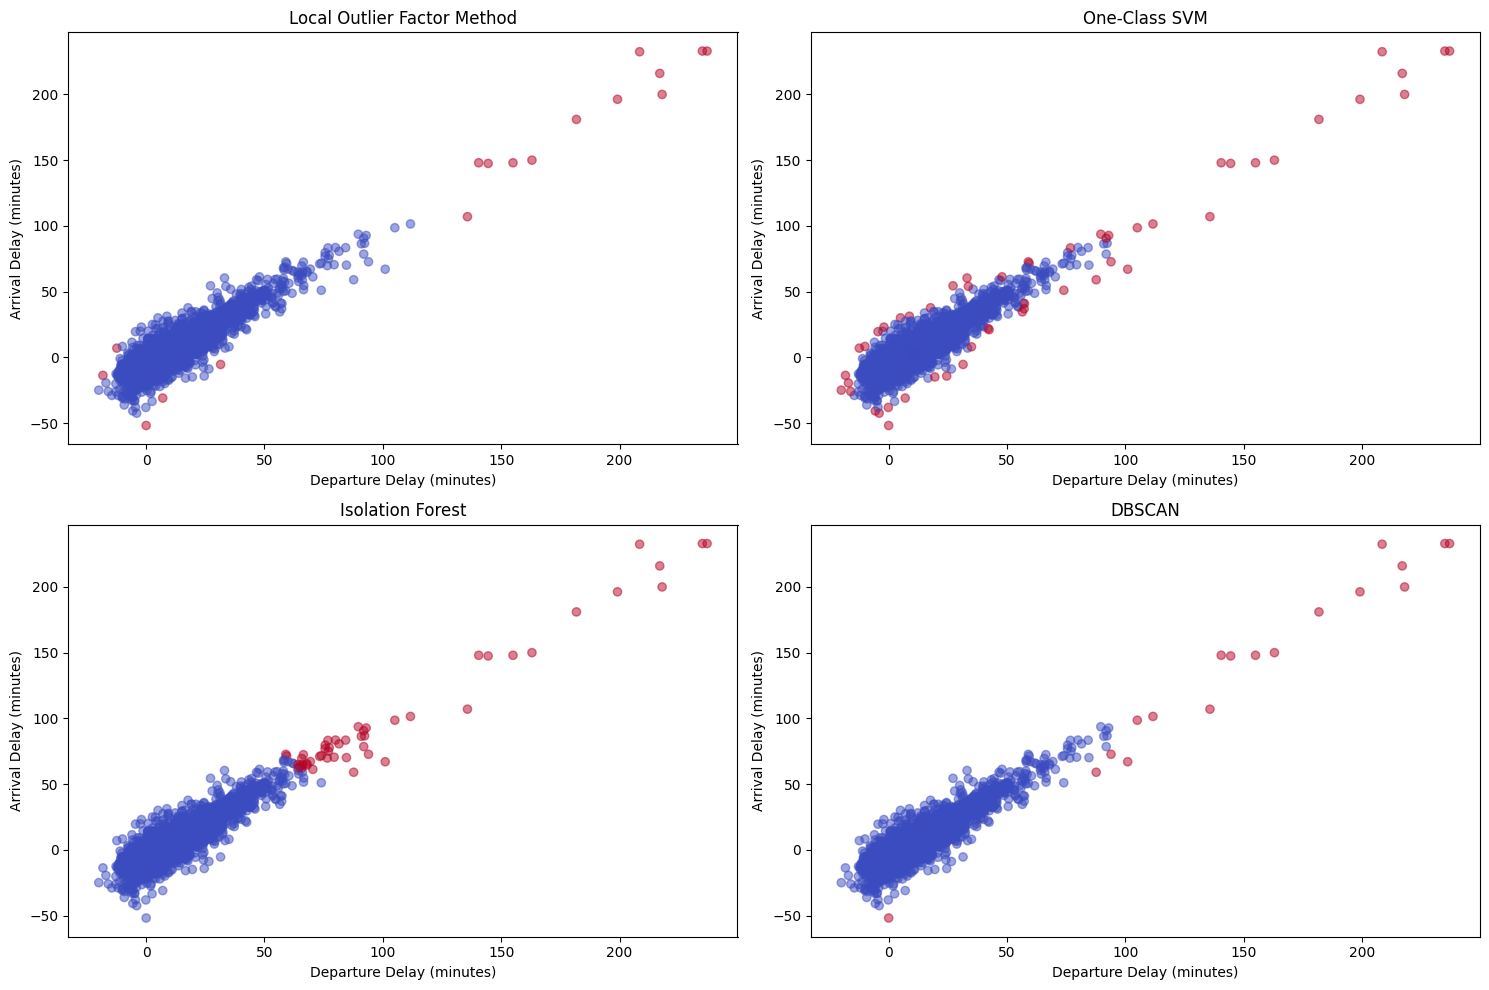

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM


# One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.01)
df['SVM_ANOMALY'] = oc_svm.fit_predict(df[['AVG_DEP_DELAY', 'AVG_ARR_DELAY']])
df['SVM_ANOMALY'] = df['SVM_ANOMALY'] == -1

# Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.003)
df['LOF_ANOMALY'] = lof.fit_predict(df[['AVG_DEP_DELAY', 'AVG_ARR_DELAY']])
df['LOF_ANOMALY'] = df['LOF_ANOMALY'] == -1


# Isolation Forest
iso_forest = IsolationForest(contamination=0.009)
df['ISO_ANOMALY'] = iso_forest.fit_predict(df[['AVG_DEP_DELAY', 'AVG_ARR_DELAY']])
df['ISO_ANOMALY'] = df['ISO_ANOMALY'] == -1

# DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['AVG_DEP_DELAY', 'AVG_ARR_DELAY']])
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_ANOMALY'] = dbscan.fit_predict(X_scaled)
df['DBSCAN_ANOMALY'] = df['DBSCAN_ANOMALY'] == -1

# Plotting all anomaly detection methods
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Local Outlier Factor
axes[0, 0].scatter(df['AVG_DEP_DELAY'], df['AVG_ARR_DELAY'], c=df['LOF_ANOMALY'], cmap='coolwarm', alpha=0.5)
axes[0, 0].set_title("Local Outlier Factor Method")
axes[0, 0].set_xlabel("Departure Delay (minutes)")
axes[0, 0].set_ylabel("Arrival Delay (minutes)")

# One-Class SVM
axes[0,1].scatter(df['AVG_DEP_DELAY'], df['AVG_ARR_DELAY'], c=df['SVM_ANOMALY'], cmap='coolwarm', alpha=0.5)
axes[0,1].set_title("One-Class SVM")
axes[0,1].set_xlabel("Departure Delay (minutes)")
axes[0,1].set_ylabel("Arrival Delay (minutes)")


# Isolation Forest
axes[1, 0].scatter(df['AVG_DEP_DELAY'], df['AVG_ARR_DELAY'], c=df['ISO_ANOMALY'], cmap='coolwarm', alpha=0.5)
axes[1, 0].set_title("Isolation Forest")
axes[1, 0].set_xlabel("Departure Delay (minutes)")
axes[1, 0].set_ylabel("Arrival Delay (minutes)")

# DBSCAN
axes[1, 1].scatter(df['AVG_DEP_DELAY'], df['AVG_ARR_DELAY'], c=df['DBSCAN_ANOMALY'], cmap='coolwarm', alpha=0.5)
axes[1, 1].set_title("DBSCAN")
axes[1, 1].set_xlabel("Departure Delay (minutes)")
axes[1, 1].set_ylabel("Arrival Delay (minutes)")

plt.tight_layout()
plt.show()


# **Validation of the Results**

Since the results of anomaly
detection can vary between algorithms due to differences in their underlying methodologies, we adopted a majority
voting approach to achieve a more robust and reliable classification. The majority voting approach combines the
predictions of the four algorithms. For each data point, we counted the number of algorithms that classified it as an
anomaly. If at least 3 out of 4 algorithms identified a point as an anomaly, it was classified as an anomaly under the
majority vote. Otherwise, the point was classified as normal.

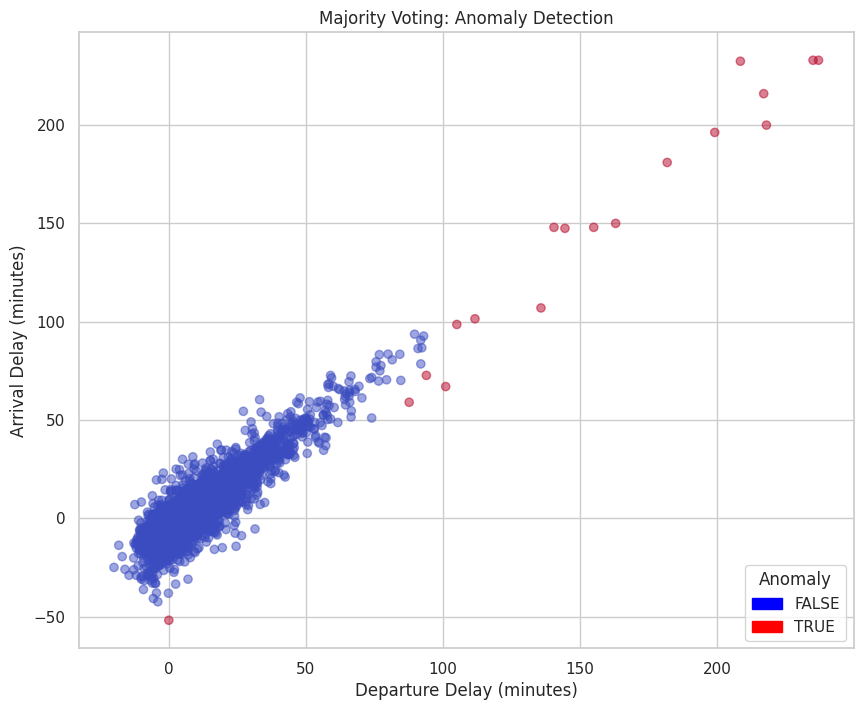

In [71]:
df['MAJORITY_VOTE_ANOMALY'] = (
    df[['SVM_ANOMALY', 'LOF_ANOMALY', 'ISO_ANOMALY', 'DBSCAN_ANOMALY']].sum(axis=1) >= 3
)

# Création du scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df['AVG_DEP_DELAY'], df['AVG_ARR_DELAY'],
    c=df['MAJORITY_VOTE_ANOMALY'],
    cmap='coolwarm',
    alpha=0.5
)

# Titre et labels des axes
plt.title("Majority Voting: Anomaly Detection")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Arrival Delay (minutes)")

# Création de la légende avec TRUE et FALSE
legend_labels = [mpatches.Patch(color='blue', label='FALSE'),
                 mpatches.Patch(color='red', label='TRUE')]
plt.legend(handles=legend_labels, title="Anomaly", loc="lower right")

# Affichage du plot
plt.show()
